In [ ]:
pip install prophet

In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
a = yf.download('BTC-USD')
a

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-06-27,30274.320312,31006.787109,30236.650391,30688.164062,30688.164062,16428827944
2023-06-28,30696.560547,30703.279297,29921.822266,30086.246094,30086.246094,14571500779
2023-06-29,30086.187500,30796.250000,30057.203125,30445.351562,30445.351562,13180860821


In [ ]:
#Filtering
a.reset_index(inplace=True)
a = a[['Date', 'Adj Close']]
a

KeyError: ignored

In [ ]:
a.columns = ['ds','y']

In [ ]:
a

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3205,2023-06-27,30688.164062
3206,2023-06-28,30086.246094
3207,2023-06-29,30445.351562
3208,2023-06-30,30477.251953


In [ ]:
model = Prophet()

In [ ]:
model.fit(a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1hqq_yyl/alw1aihl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1hqq_yyl/oqps37xm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85194', 'data', 'file=/tmp/tmp1hqq_yyl/alw1aihl.json', 'init=/tmp/tmp1hqq_yyl/oqps37xm.json', 'output', 'file=/tmp/tmp1hqq_yyl/prophet_modelqtjwl4v5/prophet_model-20230701123221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
a.tail()

,ds,y
3205,2023-06-27,30688.164062
3206,2023-06-28,30086.246094
3207,2023-06-29,30445.351562
3208,2023-06-30,30477.251953
3209,2023-07-01,30579.392578


In [ ]:
#Prediction
future_pred = model.make_future_dataframe(periods = 50)

In [ ]:
future_pred.tail()

,ds
3255,2023-08-16
3256,2023-08-17
3257,2023-08-18
3258,2023-08-19
3259,2023-08-20


In [ ]:
predictions = model.predict(future_pred)
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3255,2023-08-16,12529.417776,6144.829790,18645.372844,12406.694810,12649.408953,-534.591092,-534.591092,-534.591092,25.134226,25.134226,25.134226,-559.725318,-559.725318,-559.725318,0.0,0.0,0.0,11994.826684
3256,2023-08-17,12479.020984,5728.719255,18184.972596,12352.436230,12608.720976,-573.651416,-573.651416,-573.651416,-16.385131,-16.385131,-16.385131,-557.266285,-557.266285,-557.266285,0.0,0.0,0.0,11905.369568
3257,2023-08-18,12428.624192,5610.063507,18170.847755,12292.957344,12570.289898,-558.800260,-558.800260,-558.800260,2.841588,2.841588,2.841588,-561.641848,-561.641848,-561.641848,0.0,0.0,0.0,11869.823932
3258,2023-08-19,12378.227400,5337.903562,18049.336350,12231.780754,12526.374461,-551.108804,-551.108804,-551.108804,21.296008,21.296008,21.296008,-572.404811,-572.404811,-572.404811,0.0,0.0,0.0,11827.118596
3259,2023-08-20,12327.830607,5036.596280,17669.727662,12161.893731,12493.032742,-606.426094,-606.426094,-606.426094,-17.351966,-17.351966,-17.351966,-589.074128,-589.074128,-589.074128,0.0,0.0,0.0,11721.404514


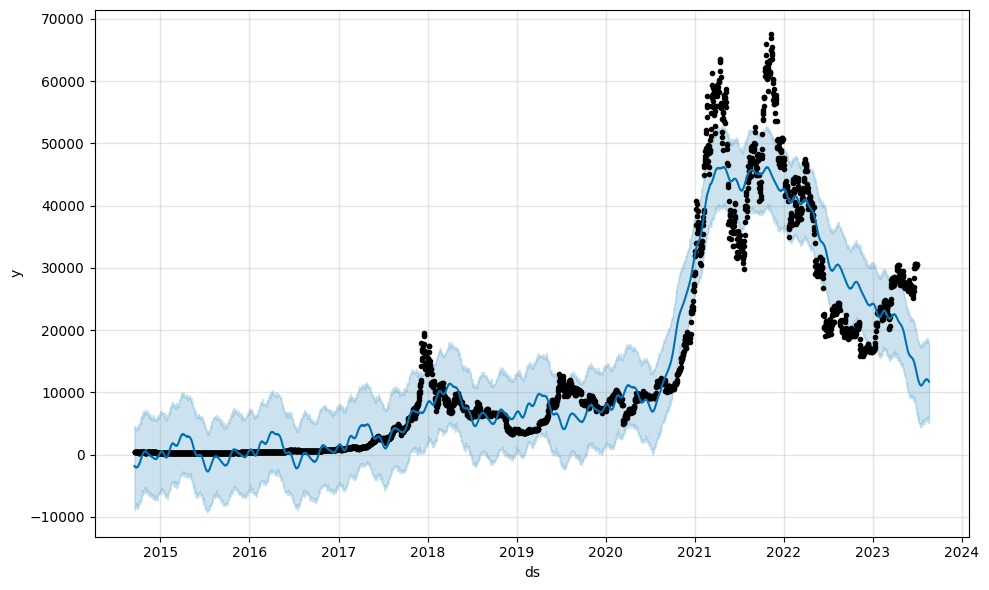

In [ ]:
fig = model.plot(predictions)

In [ ]:
from prophet.plot import plot_plotly
plot_plotly(model,predictions)

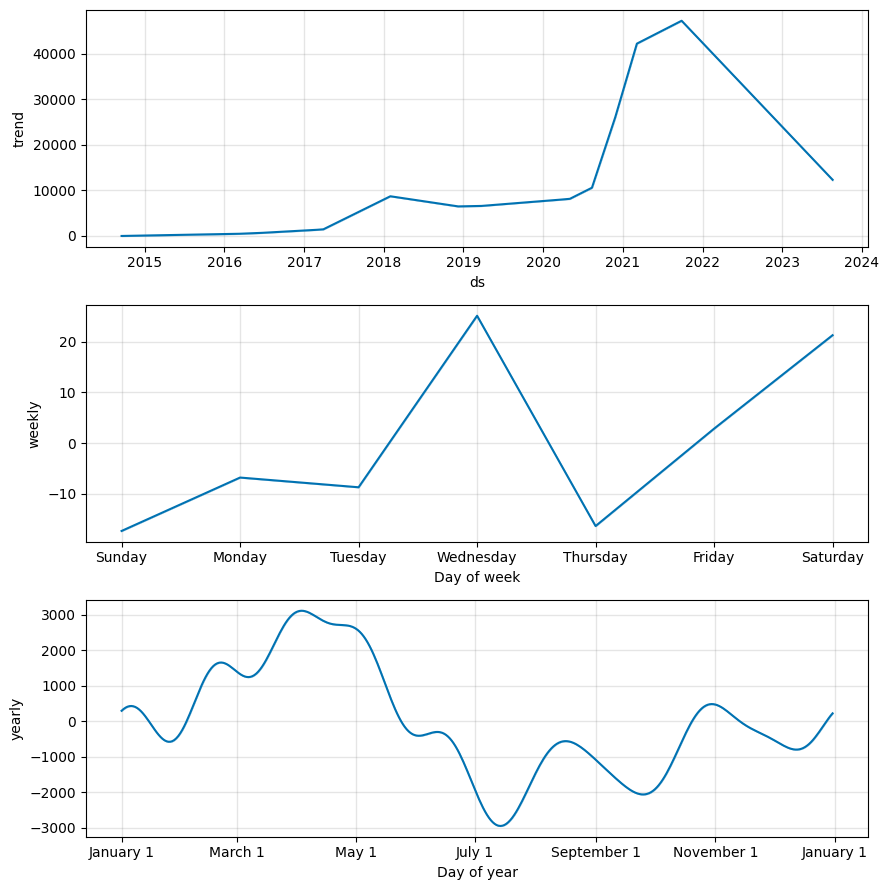

In [ ]:
fig2 = model.plot_components(predictions)

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
a_cv = cross_validation(model,horizon = '5 days')

INFO:prophet:Making 1136 forecasts with cutoffs between 2015-09-18 12:00:00 and 2023-06-26 00:00:00


  0%|          | 0/1136 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63954', 'data', 'file=/tmp/tmp1hqq_yyl/68y5c2wl.json', 'init=/tmp/tmp1hqq_yyl/t5aptroj.json', 'output', 'file=/tmp/tmp1hqq_yyl/prophet_modelahd9qprd/prophet_model-20230701123826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:38:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1hqq_yyl/vop7zbbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1hqq_yyl/wzwiwi7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5886', 'data', 'file=/tmp/tmp1hqq_yyl/vop7zbbb.json', 'init=/tmp

In [ ]:
a_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
5675,2023-06-27,12562.098156,6212.439599,18829.293902,30688.164062,2023-06-26
5676,2023-06-28,12397.787772,6077.823334,18956.672395,30086.246094,2023-06-26
5677,2023-06-29,12159.687284,5730.201038,18498.649741,30445.351562,2023-06-26
5678,2023-06-30,11988.875457,5643.275354,18692.801486,30477.251953,2023-06-26
5679,2023-07-01,11824.277279,5822.729023,17918.932393,30579.392578,2023-06-26


In [ ]:
from prophet.diagnostics import performance_metrics
a_performance = performance_metrics(a_cv)
a_performance

In [ ]:
from prophet import plot
fig3 = plot.plot_cross_validation_metric(a_cv, metric = 'mape')

In [ ]:
fig4 = plot.plot_cross_validation_metric(a_cv, metric = 'rmse')

In [ ]:
fig5 = plot.plot_cross_validation_metric(a_cv, metric = 'mdape')

In [ ]:
fig6 = plot.plot_cross_validation_metric(a_cv, metric = 'smape')

In [ ]:
fig7 = plot.plot_cross_validation_metric(a_cv, metric = 'coverage')